In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_train.csv' , header=0)
train = train.replace('no_link_known', 1)
train = train.replace(to_replace=r'^((?!no_link_known).)*$', value=0, regex=True)
train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,-0.106307,-0.076018,-0.081182,0.028428,0.006551,-0.049328,-0.131857,-0.037628,0.003007,0.085964,...,-0.088359,-0.011955,0.072061,-0.239798,0.282087,-0.085467,0.008205,0.139863,-0.100712,0
1,-0.012138,-0.009232,0.024595,-0.021252,-0.015880,-0.047778,-0.011917,0.028311,-0.034624,0.059547,...,-0.274189,-0.501134,0.305044,0.213702,-0.469372,0.195861,-0.185408,0.056212,0.258238,0
2,-0.052939,-0.071929,0.021859,0.011558,-0.049912,-0.007417,0.011347,0.026139,-0.013402,-0.028613,...,-0.009154,-0.019550,-0.094600,0.098562,-0.025860,-0.037455,-0.112670,0.071711,0.070507,1
3,-0.733260,0.043293,0.119687,-0.123384,-0.071939,-0.126068,0.032904,0.110734,-0.096527,-0.095115,...,-0.101405,0.220706,0.192686,-0.176124,-0.216842,-0.436630,0.103777,-0.110369,-0.125698,1
4,-0.036974,-0.005872,-0.002371,-0.035732,-0.029971,-0.052257,0.016698,0.027884,0.000931,0.016802,...,0.005399,0.063239,-0.027632,-0.001155,0.048586,0.052991,0.027887,0.004721,-0.061660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364605,-0.052012,-0.050973,0.035910,-0.059969,-0.061255,-0.053517,1.033800,0.041240,-0.052969,0.050190,...,0.034043,0.038958,-0.019946,-0.008046,0.001575,-0.011575,-0.047649,-0.035770,-0.002342,1
2364606,-0.059736,-0.061631,0.070624,0.048631,0.038553,0.030114,-0.824042,0.028283,-0.084142,-0.113815,...,-0.266709,-0.537886,0.321153,0.181186,-0.507742,0.207627,-0.238616,0.106768,0.250761,0
2364607,0.036065,0.071069,-0.168564,0.064844,0.088171,0.013884,0.160834,-0.273891,0.120310,-0.068251,...,0.009662,0.028640,-0.053873,0.002138,0.008572,0.031187,-0.037569,-0.022562,0.013139,0
2364608,0.059826,0.027907,0.042077,-0.105650,-0.061793,0.070876,0.088055,-0.013670,-0.131062,0.035856,...,-0.252920,0.035881,0.221206,-0.067258,-0.011880,-0.220015,-0.025483,0.051174,-0.045477,0


In [3]:
# Validation set
val = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_val.csv' , header=0)
val = val.replace('no_link_known', 1)
val = val.replace(to_replace=r'^((?!no_link_known).)*$', value=0, regex=True)
val

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.176603,0.144554,-0.121246,0.352947,0.161330,0.119488,0.204768,-0.100077,0.156833,-0.120513,...,0.048977,0.036158,-0.062647,0.061191,0.034371,0.017874,-0.018670,-0.061726,-0.032668,1
1,0.230500,0.027735,-0.311731,-0.056029,0.097707,0.272195,0.340572,0.002959,0.306213,-0.027642,...,0.039863,0.051089,-0.081835,0.056872,0.049417,0.033689,-0.008890,-0.049069,-0.015917,0
2,0.195384,0.188668,-0.220960,-0.023338,-0.027151,0.020286,0.266949,-0.348298,0.268543,-0.163545,...,0.022186,-0.007695,-0.020189,-0.036016,0.016186,0.028108,-0.007122,0.038059,-0.028528,1
3,0.026929,0.074788,0.035858,-0.005145,-0.042590,0.019052,0.033178,0.090141,-0.043595,-0.071027,...,0.167388,0.088925,-0.027883,-0.040423,0.085831,0.083911,-0.083440,-0.009200,-0.090322,0
4,0.008397,-0.001974,-0.007151,-0.004110,-0.033697,-0.053781,-0.049135,0.044767,-0.010571,0.032441,...,0.009489,0.020247,-0.027801,0.050793,0.010482,0.012848,-0.005974,-0.019075,-0.045278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234137,0.176400,0.218860,-0.280247,0.305255,0.101689,0.111522,-0.095150,-0.109428,0.155395,-0.027120,...,0.036530,0.021950,-0.020570,-0.017535,0.031310,0.024575,-0.009150,-0.023717,-0.029366,1
234138,0.064738,0.126745,-0.028705,0.136302,0.126094,0.199326,0.161574,-0.012139,0.113478,-0.176163,...,0.046814,0.006897,-0.067952,-0.032035,-0.598163,0.024000,-0.018999,-0.023364,-0.046112,0
234139,0.009338,0.000967,0.000705,-0.058703,-0.058091,-0.004134,0.016403,0.012446,-0.016351,-0.027040,...,-0.064294,0.002646,-0.086266,0.143449,0.015991,-0.137966,0.122271,-0.188965,0.189511,1
234140,0.044665,-0.104824,-0.071804,-0.174067,-0.122643,-0.149357,-0.144405,0.002902,-0.149952,0.087081,...,-0.013302,0.045505,0.034258,0.093059,0.120011,0.007771,-0.001258,-0.075868,-0.069958,1


In [4]:
# Embeddings validation test set
embval = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_test.csv' , header=0)
embval = embval.replace('no_link_known', 1)
embval = embval.replace(to_replace=r'^((?!no_link_known).)*$', value=0, regex=True)
embval

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.143444,0.093716,-0.137825,-0.124671,-0.096162,0.134430,0.258746,-0.316311,0.063991,-0.294353,...,0.006072,-0.018314,-0.036506,0.058785,0.032657,0.068184,-0.035997,-0.134148,0.025432,0
1,0.018331,0.045232,0.001957,0.000281,-0.007401,0.909883,0.018149,-0.002059,0.016732,-0.009270,...,0.023204,0.026533,-0.035074,-0.007182,0.016385,0.017070,-0.040005,-0.024660,-0.013184,0
2,0.004819,0.054722,0.001181,0.086243,0.076688,0.046515,0.041210,-0.023142,0.060256,-0.125768,...,0.027227,0.041565,-0.049319,-0.046994,0.046374,0.048004,-0.061171,0.001339,-0.120643,0
3,-0.049837,-0.037773,0.039730,-0.042049,-0.032324,-0.035344,0.037563,-0.021121,-0.032801,-0.031846,...,0.033551,0.026903,-0.041563,0.005378,0.066259,0.040746,-0.047484,-0.029613,-0.017699,0
4,0.088384,0.012557,-0.111223,-0.101479,-0.090372,-0.079046,-0.071125,-0.055374,-0.095753,0.117984,...,-0.012302,-0.038869,-0.055369,0.045610,-0.033408,0.062304,-0.035480,-0.049748,-0.004965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233779,0.028791,0.064465,0.016604,-0.005840,-0.009796,0.008425,0.013725,-0.001496,-0.007599,-0.075763,...,-0.004248,0.102976,-0.020468,-0.024157,-0.978574,0.016163,0.027392,-0.110037,-0.073671,1
233780,-0.004770,-0.048431,0.002252,-0.001596,-0.046143,-0.110508,-0.025915,0.009208,0.006273,0.032961,...,-0.211187,-0.086243,0.064273,-0.023515,-0.043269,-0.097919,0.059382,0.175372,0.076994,1
233781,0.027764,0.056585,-0.033077,-0.022086,-0.067494,-0.015891,-0.032308,0.012968,0.015531,-0.080184,...,0.051418,0.101561,-0.006042,-0.104236,0.101335,-0.052880,0.089030,0.016790,-0.083716,1
233782,0.078459,0.079812,-0.076346,-0.083066,-0.081467,-0.066998,-0.050276,-0.002377,-0.093573,-0.045859,...,0.021252,0.069637,-0.038760,0.034591,0.018672,0.037403,-0.031772,-0.048327,-0.011563,0


In [5]:
# Experiment setup
s = setup(train, target = 'ground_truth', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,1847
1,Target,ground_truth
2,Target type,Binary
3,Original data shape,"(2364610, 101)"
4,Transformed data shape,"(2364610, 101)"
5,Transformed train set shape,"(1891688, 101)"
6,Transformed test set shape,"(472922, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [6]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9717,0.9282,0.9767,0.9518,0.9060,0.9072
1,0.9530,0.9713,0.9275,0.9774,0.9518,0.9060,0.9072
2,0.9521,0.9709,0.9262,0.9768,0.9508,0.9041,0.9054
3,0.9525,0.9711,0.9267,0.9771,0.9512,0.9050,0.9062
4,0.9532,0.9714,0.9277,0.9776,0.9520,0.9065,0.9077
5,0.9535,0.9717,0.9280,0.9778,0.9523,0.9070,0.9082
6,0.9534,0.9716,0.9285,0.9773,0.9523,0.9069,0.9080
7,0.9534,0.9717,0.9275,0.9781,0.9521,0.9068,0.9080
8,0.9529,0.9715,0.9270,0.9776,0.9516,0.9058,0.9070


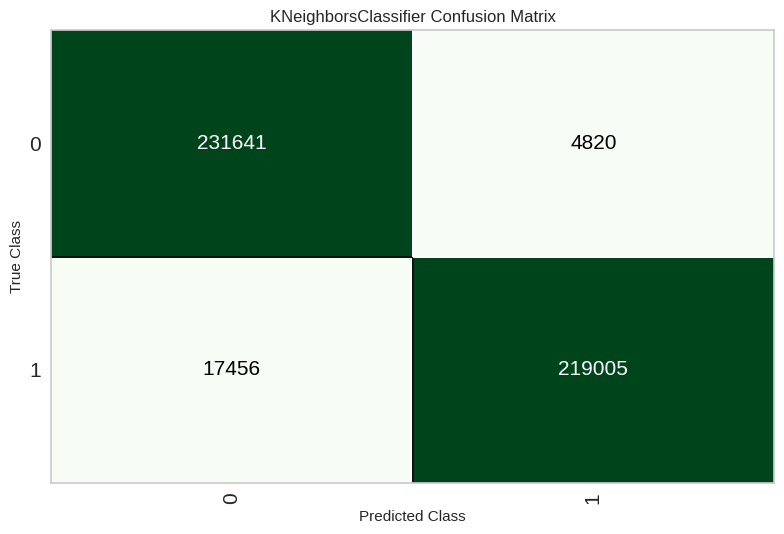

In [7]:
plot_model(knn, plot = 'confusion_matrix')

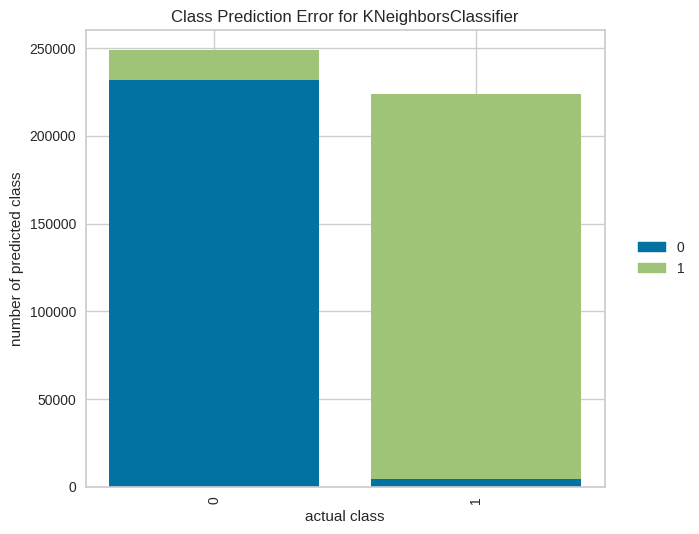

In [8]:
plot_model(knn, plot = 'error')

In [9]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [10]:
knn_val_pred = predict_model(knn, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4912,0.5171,0.8195,0.4947,0.6169,-0.0177,-0.0235


In [11]:
knn_val_pred = predict_model(knn, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4836,0.5104,0.8163,0.4902,0.6125,-0.0328,-0.0439


In [12]:
save_model(knn, 'models_classif/convkb/binary_emb_train/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Naive Bayes

In [13]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9263,0.9630,0.9389,0.9159,0.9272,0.8527,0.8529
1,0.9272,0.9626,0.9386,0.9177,0.9280,0.8545,0.8547
2,0.9257,0.9620,0.9368,0.9165,0.9265,0.8515,0.8517
3,0.9265,0.9621,0.9380,0.9169,0.9273,0.8530,0.8532
4,0.9270,0.9628,0.9393,0.9168,0.9279,0.8541,0.8543
5,0.9266,0.9625,0.9384,0.9169,0.9275,0.8533,0.8535
6,0.9273,0.9623,0.9391,0.9174,0.9281,0.8546,0.8548
7,0.9272,0.9630,0.9381,0.9181,0.9280,0.8544,0.8546
8,0.9269,0.9632,0.9383,0.9173,0.9277,0.8537,0.8540


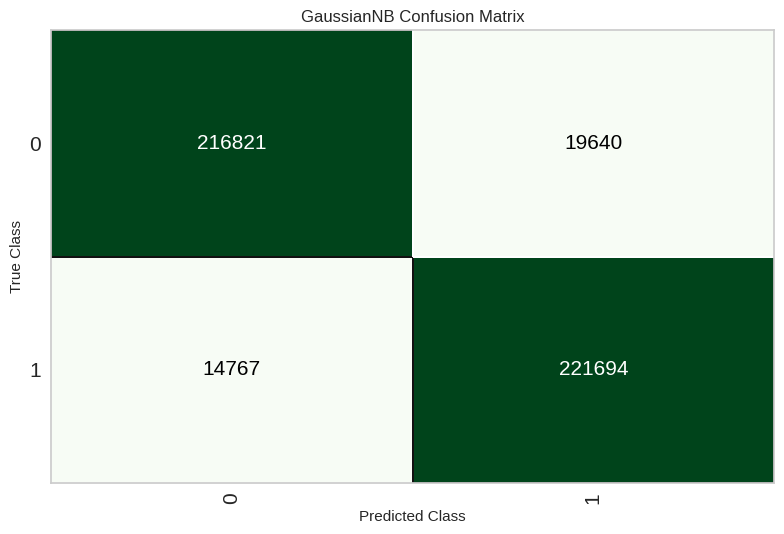

In [14]:
plot_model(nb, plot = 'confusion_matrix')

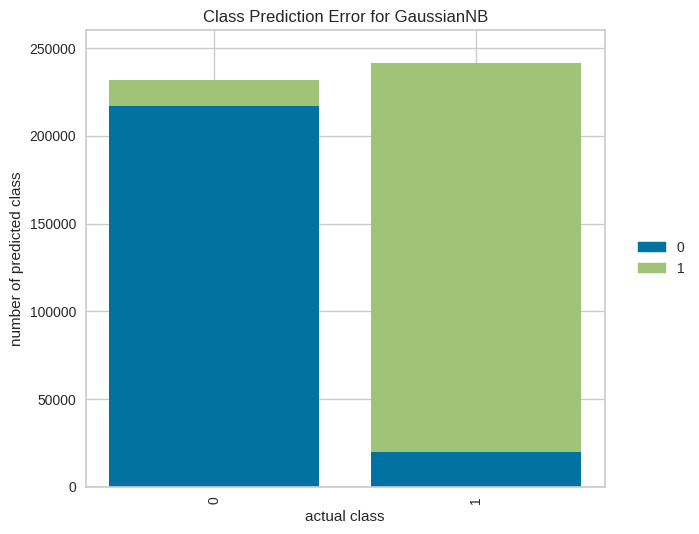

In [15]:
plot_model(nb, plot = 'error')

In [16]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [17]:
nb_val_pred = predict_model(nb, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4256,0.3573,0.8501,0.4598,0.5968,-0.1487,-0.2814


In [18]:
nb_val_pred = predict_model(nb, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4256,0.3548,0.8479,0.4597,0.5961,-0.1488,-0.2780


In [19]:
save_model(nb, 'models_classif/convkb/binary_emb_train/nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# Decision Tree Classifier

In [20]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9504,0.9503,0.9498,0.9509,0.9503,0.9007,0.9007
1,0.9504,0.9504,0.9512,0.9496,0.9504,0.9007,0.9007
2,0.9501,0.9501,0.9499,0.9503,0.9501,0.9002,0.9002
3,0.9494,0.9494,0.9479,0.9507,0.9493,0.8988,0.8988
4,0.9501,0.9501,0.9496,0.9506,0.9501,0.9002,0.9002
5,0.9503,0.9503,0.9507,0.9499,0.9503,0.9006,0.9006
6,0.9509,0.9509,0.9498,0.9519,0.9508,0.9018,0.9018
7,0.9500,0.9500,0.9500,0.9501,0.9500,0.9000,0.9000
8,0.9503,0.9503,0.9496,0.9510,0.9503,0.9006,0.9007


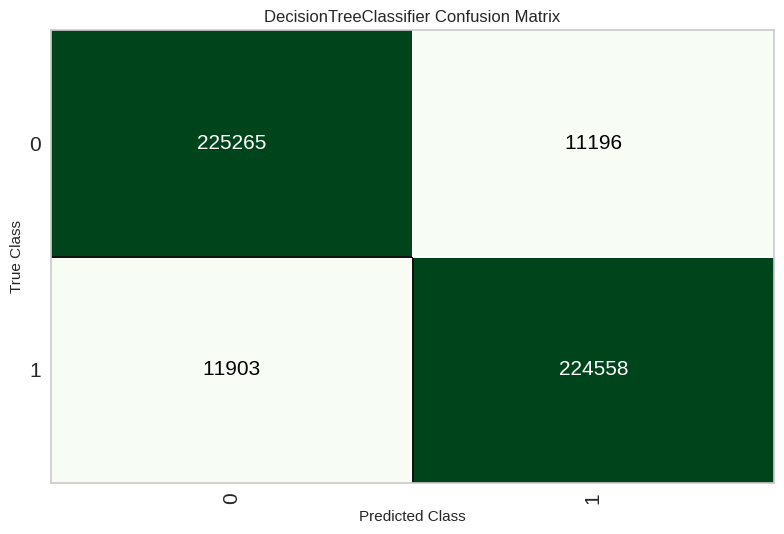

In [21]:
plot_model(dt, plot = 'confusion_matrix')

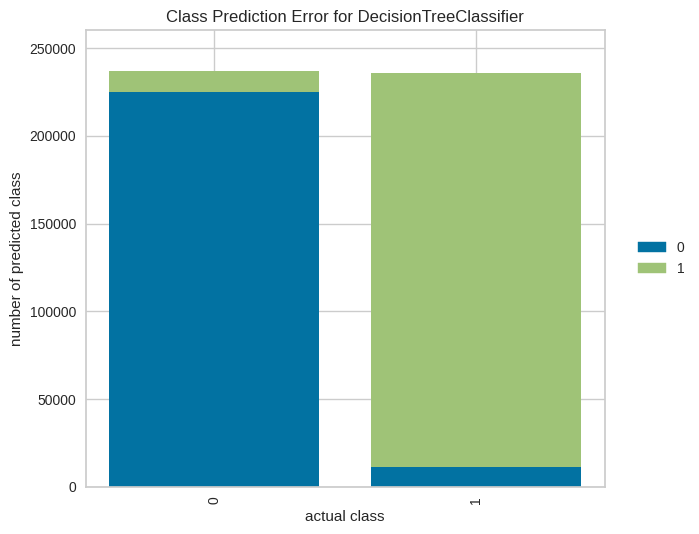

In [22]:
plot_model(dt, plot = 'error')

In [23]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [24]:
dt_val_pred = predict_model(dt, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5396,0.5396,0.8598,0.5242,0.6513,0.0793,0.1032


In [25]:
dt_val_pred = predict_model(dt, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5338,0.5338,0.8572,0.5205,0.6477,0.0675,0.0885


In [26]:
save_model(dt, 'models_classif/convkb/binary_emb_train/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# SVM - Linear Kernel

In [27]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9446,0.0000,0.9209,0.9668,0.9433,0.8892,0.8902
1,0.9449,0.0000,0.9210,0.9671,0.9435,0.8897,0.8908
2,0.9434,0.0000,0.9191,0.9661,0.9420,0.8868,0.8879
3,0.9444,0.0000,0.9207,0.9664,0.9430,0.8887,0.8897
4,0.9447,0.0000,0.9212,0.9667,0.9434,0.8895,0.8905
5,0.9446,0.0000,0.9208,0.9668,0.9433,0.8892,0.8902
6,0.9451,0.0000,0.9214,0.9672,0.9438,0.8902,0.8912
7,0.9454,0.0000,0.9206,0.9687,0.9440,0.8909,0.8920
8,0.9450,0.0000,0.9208,0.9676,0.9436,0.8899,0.8910


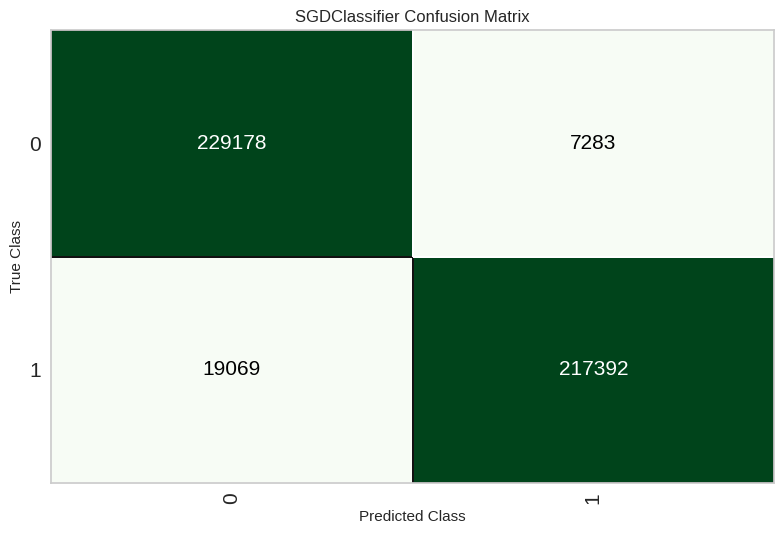

In [28]:
plot_model(svm, plot = 'confusion_matrix')

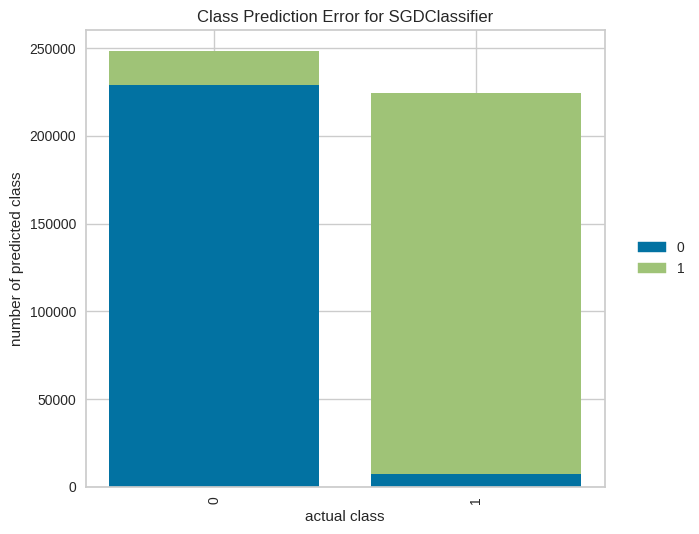

In [29]:
plot_model(svm, plot = 'error')

In [30]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [31]:
svm_val_pred = predict_model(svm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4201,0.4201,0.8015,0.4547,0.5802,-0.1598,-0.2471


In [32]:
svm_val_pred = predict_model(svm, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4208,0.4208,0.8003,0.4550,0.5801,-0.1585,-0.2434


In [33]:
save_model(svm, 'models_classif/convkb/binary_emb_train/svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False,

# Ridge Classifier

In [34]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9434,0.0000,0.9227,0.9624,0.9422,0.8867,0.8875
1,0.9432,0.0000,0.9229,0.9620,0.9421,0.8865,0.8872
2,0.9418,0.0000,0.9206,0.9613,0.9405,0.8835,0.8843
3,0.9428,0.0000,0.9224,0.9616,0.9416,0.8855,0.8863
4,0.9432,0.0000,0.9229,0.9620,0.9420,0.8865,0.8872
5,0.9431,0.0000,0.9229,0.9618,0.9419,0.8862,0.8869
6,0.9435,0.0000,0.9232,0.9623,0.9423,0.8870,0.8877
7,0.9439,0.0000,0.9225,0.9638,0.9427,0.8878,0.8886
8,0.9436,0.0000,0.9226,0.9631,0.9424,0.8873,0.8881


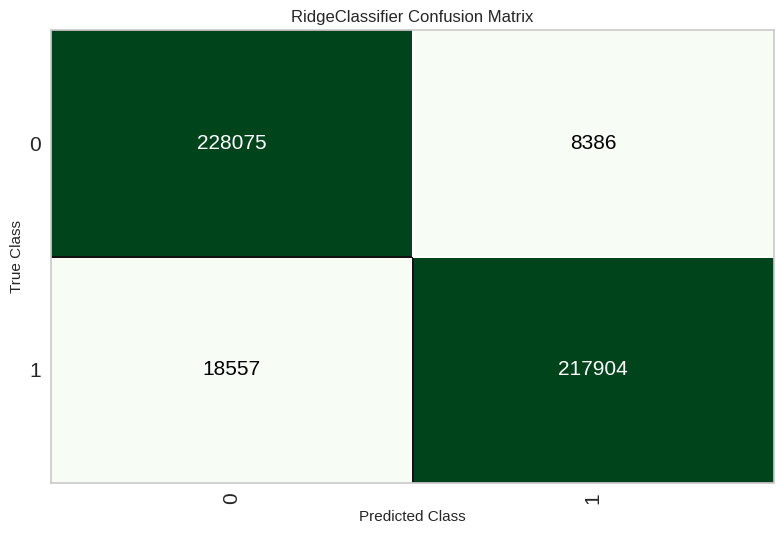

In [35]:
plot_model(ridge, plot = 'confusion_matrix')

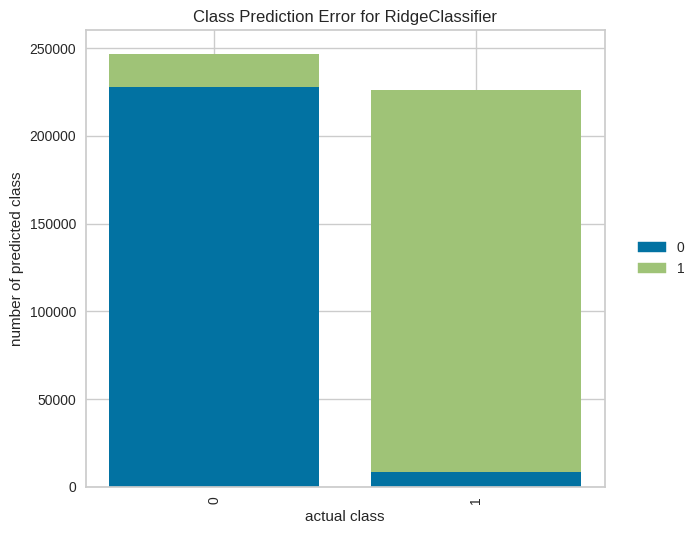

In [36]:
plot_model(ridge, plot = 'error')

In [37]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,1847
solver,auto
tol,0.0001


In [38]:
ridge_val_pred = predict_model(ridge, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4215,0.4215,0.8016,0.4554,0.5808,-0.1569,-0.2416


In [39]:
ridge_val_pred = predict_model(ridge, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4225,0.4225,0.8003,0.4559,0.5809,-0.1550,-0.2366


In [40]:
save_model(ridge, 'models_classif/convkb/binary_emb_train/ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Random Forest

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9725,0.9952,0.9612,0.9834,0.9722,0.9450,0.9453
1,0.9716,0.9947,0.9601,0.9827,0.9713,0.9432,0.9435
2,0.9713,0.9951,0.9599,0.9823,0.9710,0.9427,0.9429
3,0.9719,0.9949,0.9607,0.9828,0.9716,0.9439,0.9441
4,0.9724,0.9949,0.9611,0.9833,0.9721,0.9448,0.9451
5,0.9721,0.9949,0.9611,0.9828,0.9718,0.9443,0.9445
6,0.9728,0.9950,0.9619,0.9833,0.9725,0.9455,0.9457
7,0.9725,0.9949,0.9608,0.9838,0.9722,0.9450,0.9452
8,0.9724,0.9950,0.9612,0.9832,0.9721,0.9448,0.9451


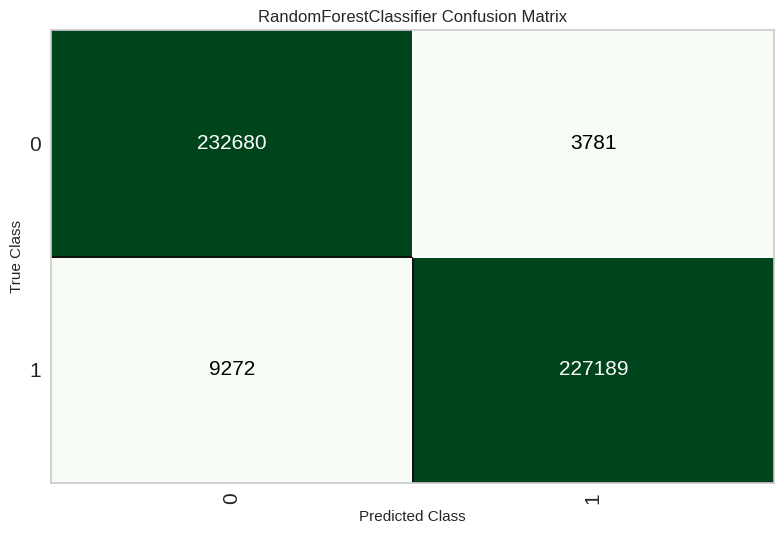

In [42]:
plot_model(rf, plot = 'confusion_matrix')

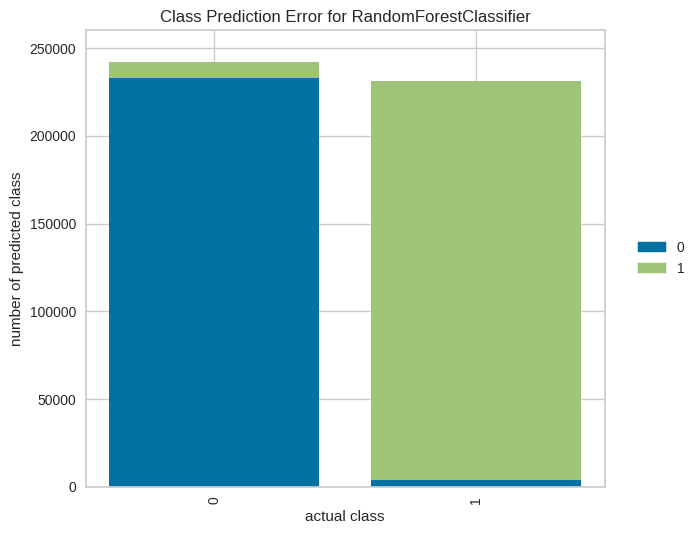

In [43]:
plot_model(rf, plot = 'error')

In [44]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [45]:
rf_val_pred = predict_model(rf, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5339,0.5871,0.9072,0.5194,0.6606,0.0679,0.1020


In [46]:
rf_val_pred = predict_model(rf, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5251,0.5820,0.9063,0.5143,0.6562,0.0502,0.0776


In [47]:
save_model(rf, 'models_classif/convkb/binary_emb_train/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

# Quadratic Discriminant Analysis

In [48]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8866,0.9653,0.9497,0.8433,0.8933,0.7732,0.7794
1,0.8854,0.9647,0.9489,0.8420,0.8923,0.7709,0.7771
2,0.8852,0.9645,0.9494,0.8414,0.8922,0.7705,0.7769
3,0.8857,0.9651,0.9496,0.8420,0.8926,0.7714,0.7777
4,0.8856,0.9649,0.9490,0.8422,0.8924,0.7712,0.7774
5,0.8866,0.9652,0.9499,0.8431,0.8933,0.7731,0.7794
6,0.8855,0.9648,0.9486,0.8423,0.8923,0.7709,0.7772
7,0.8870,0.9656,0.9492,0.8442,0.8937,0.7741,0.7801
8,0.8873,0.9657,0.9499,0.8442,0.8939,0.7746,0.7807


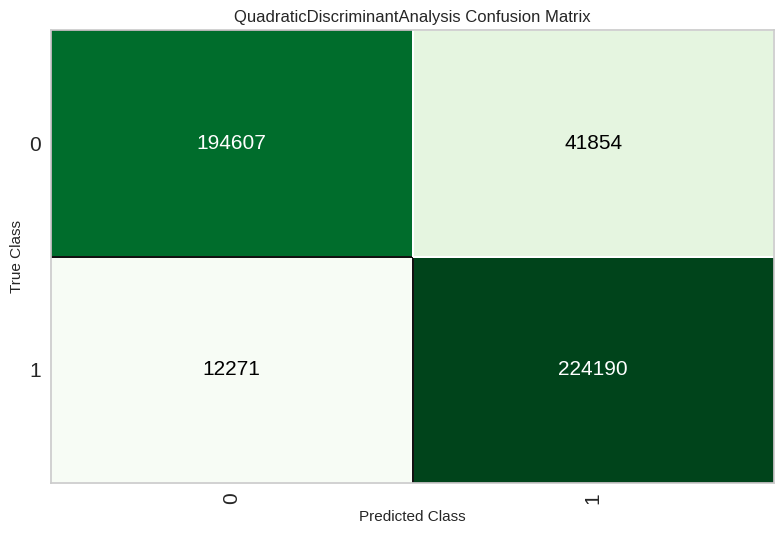

In [49]:
plot_model(qda, plot = 'confusion_matrix')

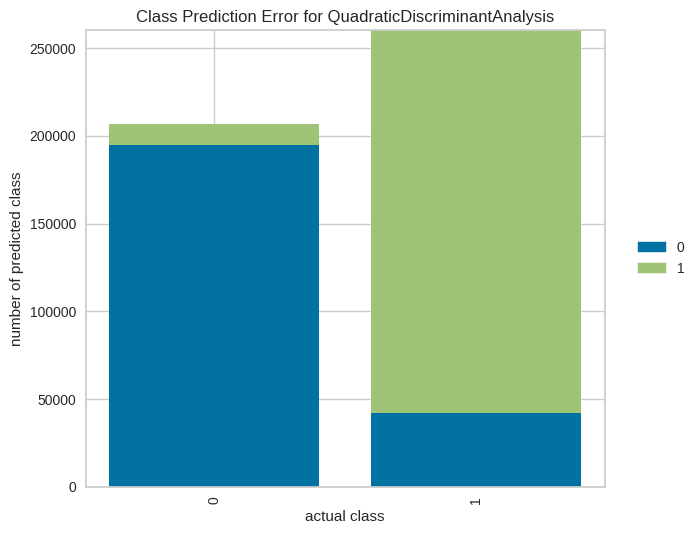

In [50]:
plot_model(qda, plot = 'error')

In [51]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [52]:
qda_val_pred = predict_model(qda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4819,0.3995,0.9228,0.4904,0.6404,-0.0362,-0.0768


In [53]:
qda_val_pred = predict_model(qda, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4822,0.4270,0.9220,0.4906,0.6404,-0.0355,-0.0747


In [54]:
save_model(qda, 'models_classif/convkb/binary_emb_train/qda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                             

# Linear Discriminant Analysis

In [55]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9433,0.9673,0.9227,0.9624,0.9422,0.8867,0.8874
1,0.9432,0.9673,0.9229,0.9620,0.9421,0.8865,0.8872
2,0.9418,0.9666,0.9206,0.9613,0.9405,0.8835,0.8843
3,0.9428,0.9669,0.9224,0.9616,0.9416,0.8855,0.8863
4,0.9432,0.9673,0.9229,0.9620,0.9420,0.8865,0.8872
5,0.9431,0.9673,0.9229,0.9618,0.9419,0.8862,0.8869
6,0.9435,0.9671,0.9232,0.9623,0.9423,0.8870,0.8877
7,0.9439,0.9673,0.9225,0.9638,0.9427,0.8878,0.8886
8,0.9436,0.9676,0.9226,0.9631,0.9424,0.8873,0.8881


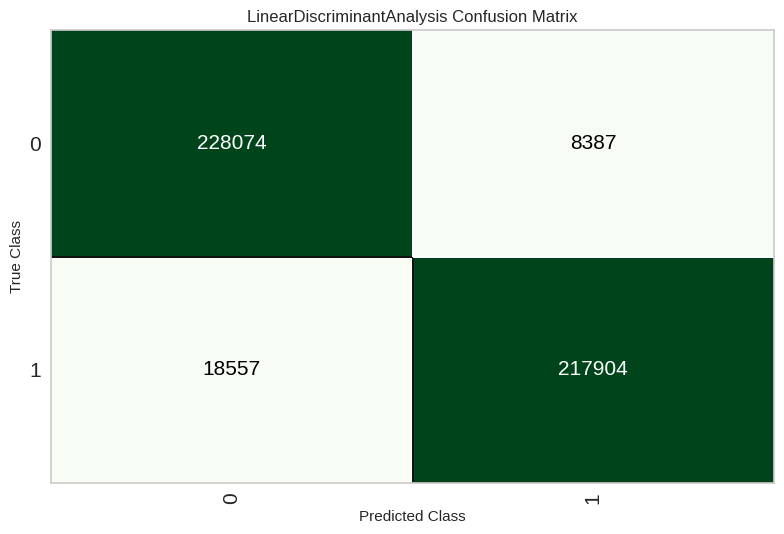

In [56]:
plot_model(lda, plot = 'confusion_matrix')

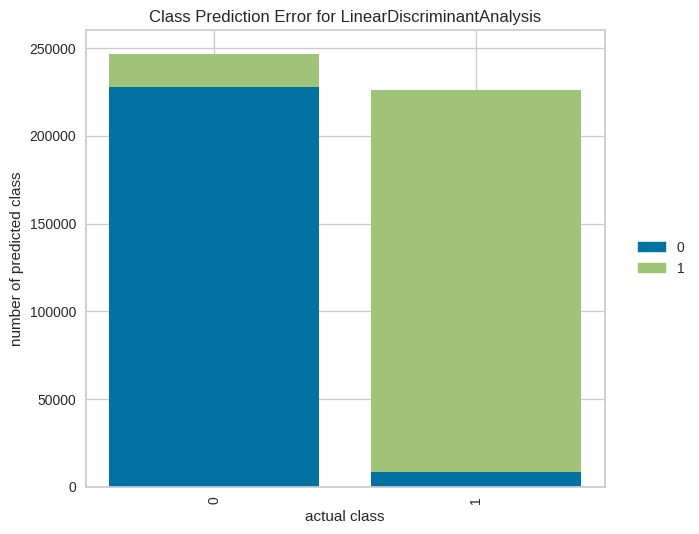

In [57]:
plot_model(lda, plot = 'error')

In [58]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [59]:
lda_val_pred = predict_model(lda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.4215,0.3578,0.8016,0.4554,0.5808,-0.1570,-0.2416


In [60]:
lda_val_pred = predict_model(lda, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.4225,0.3494,0.8003,0.4559,0.5809,-0.1550,-0.2366


In [61]:
save_model(lda, 'models_classif/convkb/binary_emb_train/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Extra Trees

In [62]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9689,0.9944,0.9578,0.9796,0.9685,0.9378,0.9380
1,0.9683,0.9938,0.9570,0.9792,0.9680,0.9367,0.9369
2,0.9675,0.9940,0.9560,0.9785,0.9671,0.9349,0.9352
3,0.9683,0.9939,0.9570,0.9791,0.9679,0.9365,0.9368
4,0.9685,0.9941,0.9576,0.9789,0.9681,0.9370,0.9372
5,0.9688,0.9940,0.9581,0.9791,0.9685,0.9377,0.9379
6,0.9692,0.9940,0.9583,0.9796,0.9688,0.9384,0.9386
7,0.9688,0.9941,0.9570,0.9800,0.9684,0.9375,0.9378
8,0.9691,0.9942,0.9580,0.9798,0.9687,0.9382,0.9384


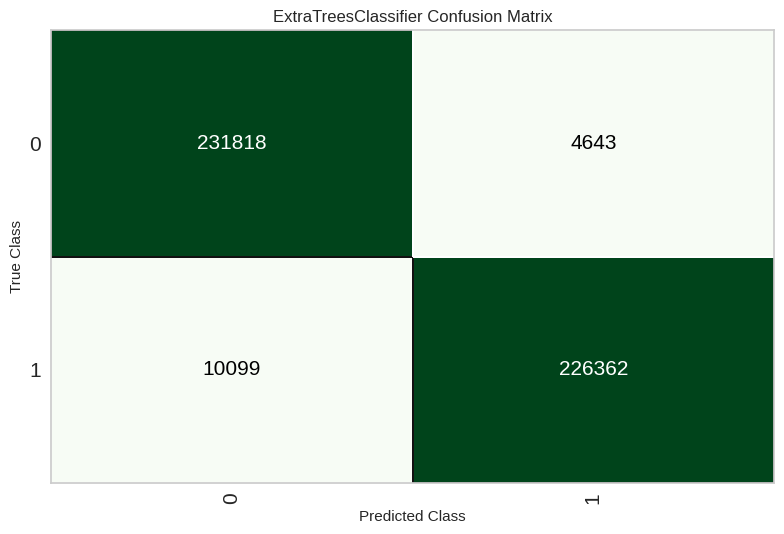

In [63]:
plot_model(et, plot = 'confusion_matrix')

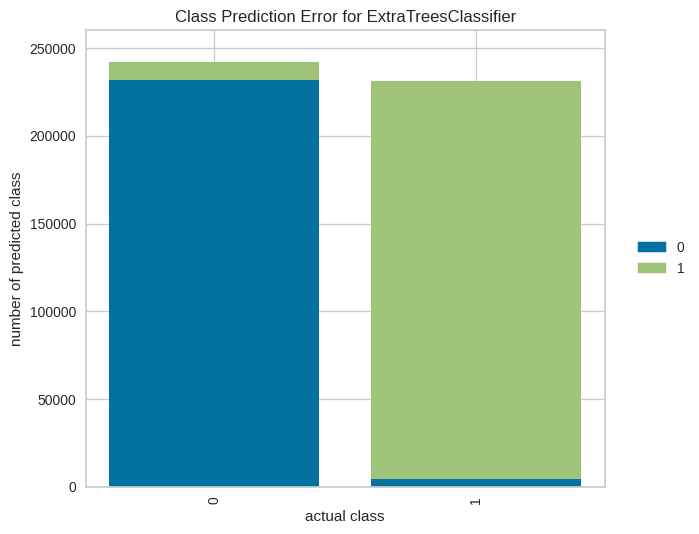

In [64]:
plot_model(et, plot = 'error')

In [65]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [66]:
et_val_pred = predict_model(et, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4996,0.5845,0.9103,0.4998,0.6453,-0.0007,-0.0013


In [67]:
et_val_pred = predict_model(et, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4990,0.5841,0.9087,0.4995,0.6446,-0.0019,-0.0034


In [68]:
save_model(et, 'models_classif/convkb/binary_emb_train/et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, crit

# Light Gradient Boosting Machine

In [69]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9768,0.9957,0.9677,0.9856,0.9766,0.9535,0.9537
1,0.9759,0.9951,0.9666,0.9849,0.9757,0.9518,0.9520
2,0.9753,0.9954,0.9654,0.9850,0.9751,0.9506,0.9508
3,0.9759,0.9954,0.9667,0.9849,0.9757,0.9519,0.9521
4,0.9764,0.9955,0.9676,0.9849,0.9762,0.9528,0.9530
5,0.9760,0.9953,0.9671,0.9847,0.9758,0.9521,0.9522
6,0.9763,0.9954,0.9672,0.9852,0.9761,0.9526,0.9528
7,0.9763,0.9955,0.9668,0.9856,0.9761,0.9526,0.9528
8,0.9767,0.9957,0.9676,0.9855,0.9765,0.9534,0.9535


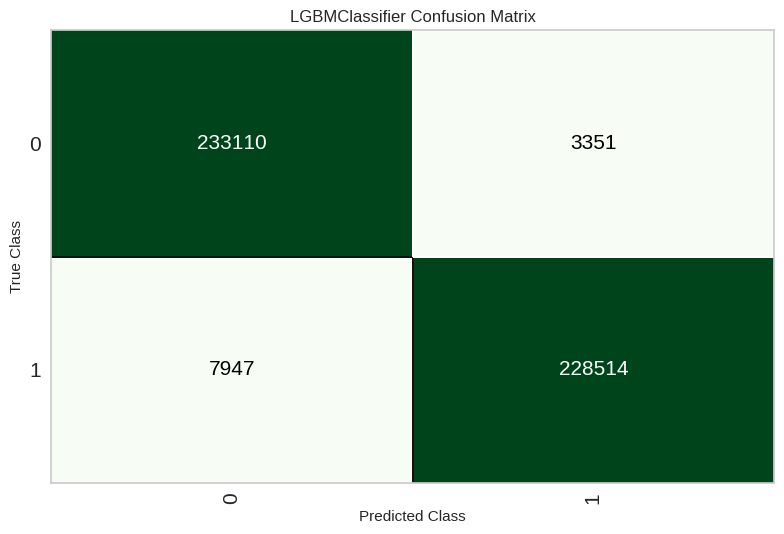

In [70]:
plot_model(lightgbm, plot = 'confusion_matrix')

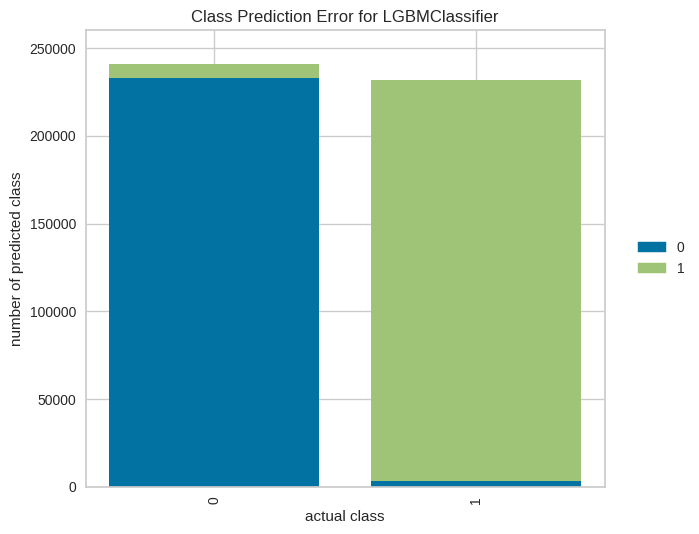

In [71]:
plot_model(lightgbm, plot = 'error')

In [72]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [73]:
lgbm_val_pred = predict_model(lightgbm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5499,0.6662,0.8932,0.5296,0.6649,0.0998,0.1372


In [74]:
lgbm_val_pred = predict_model(lightgbm, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5476,0.6657,0.8909,0.5282,0.6632,0.0952,0.1310


In [75]:
save_model(lightgbm, 'models_classif/convkb/binary_emb_train/lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, impo

# MLP Classifier

In [76]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9828,0.9968,0.9807,0.9849,0.9828,0.9656,0.9656
1,0.9821,0.9965,0.9747,0.9894,0.9820,0.9642,0.9643
2,0.9826,0.9968,0.9808,0.9843,0.9826,0.9652,0.9652
3,0.9823,0.9966,0.9769,0.9876,0.9822,0.9646,0.9647
4,0.9826,0.9967,0.9785,0.9866,0.9826,0.9653,0.9653
5,0.9826,0.9968,0.9756,0.9895,0.9825,0.9652,0.9653
6,0.9822,0.9967,0.9794,0.9849,0.9822,0.9644,0.9644
7,0.9820,0.9967,0.9808,0.9833,0.9820,0.9641,0.9641
8,0.9829,0.9970,0.9796,0.9861,0.9829,0.9658,0.9659


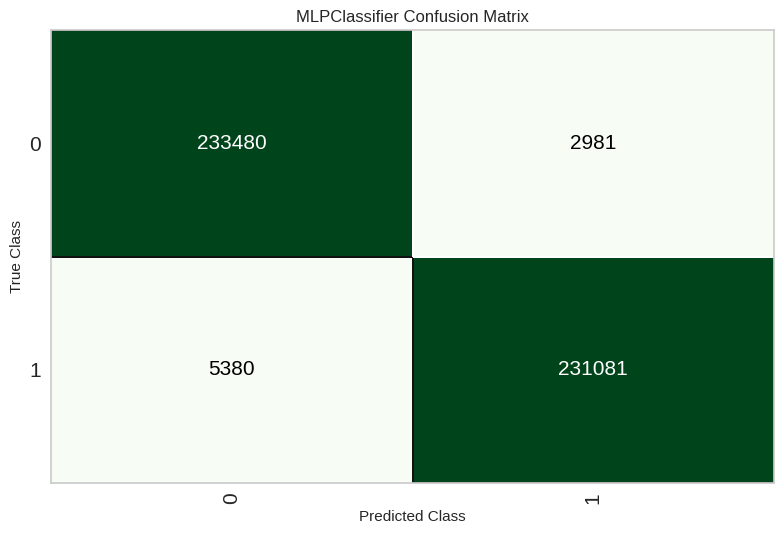

In [77]:
plot_model(mlp, plot = 'confusion_matrix')

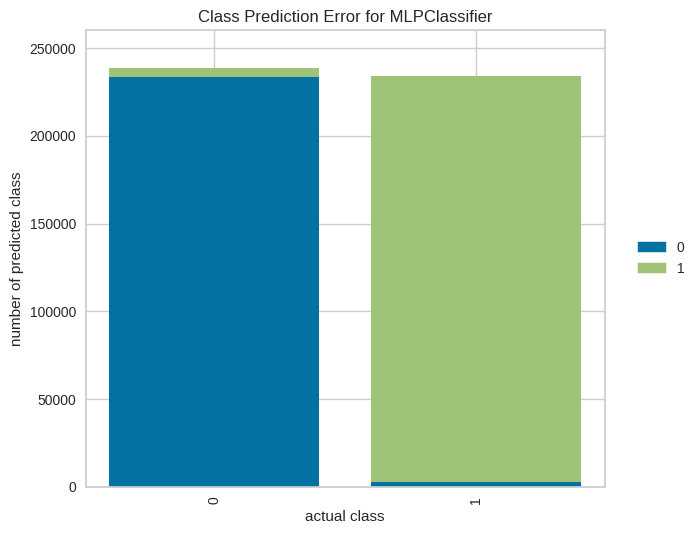

In [78]:
plot_model(mlp, plot = 'error')

In [79]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [80]:
mlp_val_pred = predict_model(mlp, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.5336,0.6093,0.9361,0.5186,0.6674,0.0672,0.1132


In [81]:
mlp_val_pred = predict_model(mlp, data=embval)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.5323,0.6116,0.9349,0.5179,0.6665,0.0645,0.1088


In [82]:
save_model(mlp, 'models_classif/convkb/binary_emb_train/mlp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, ep